# Removing Outliers in Python using Gaussian Distribution

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
#checking for null values
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
#checking size of dataset
df.shape

(8555, 3)

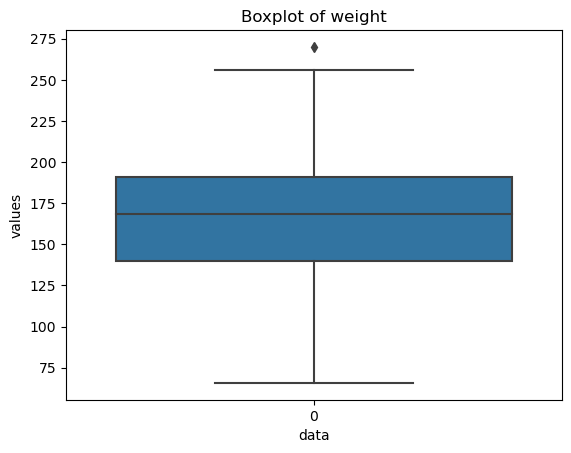

In [9]:
#drawing boxplot
sns.boxplot(df.Weight)
plt.xlabel('data')
plt.ylabel('values')
plt.title('Boxplot of weight')
plt.show()

<Axes: xlabel='Weight', ylabel='Count'>

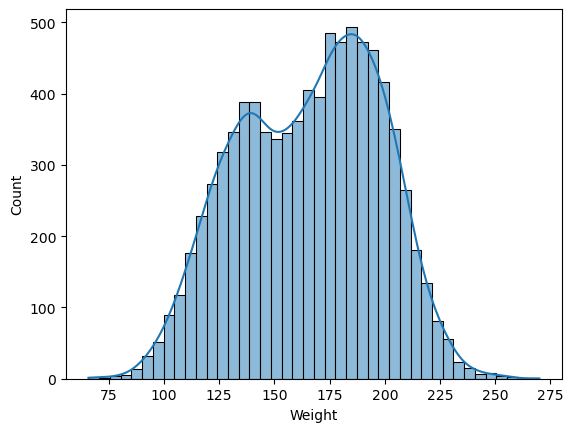

In [12]:
#drawing histogram
sns.histplot(df['Weight'],kde=True)
#histogram is seen to check the distribution od data, in this case data is normally distributed

In [14]:
#finding outliers for df
#data out of 3standard deviation are considered to be outliers
#here we choose data out of 2.5*standard deviation as outliers

mean_value = df['Weight'].mean()#finding mean
mean_value

165.6327353266768

In [15]:
std_value = df['Weight'].std() #finding standard deviation value
std_value

32.04392221721549

In [19]:
std_3 = mean_value + (2.5*std_value) #2.5*std value
std_3

245.74254086971553

In [24]:
neg_std_3 = mean_value - (2.5*std_value)# -2.5std value
neg_std_3

85.52292978363808

In [21]:
df[df['Weight']>std_3] #finding outliers, data which are greater that 2.5 standard deviation value

,Gender,Height,Weight
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989698
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741
3285,Male,78.528210,253.889004


In [22]:
df[df['Weight']<neg_std_3] #negative outliers, data out of the range or -2.5 standard deviation value

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
5026,Female,56.547975,84.872124
5214,Female,56.785434,83.993077
5360,Female,55.668202,68.982530
5740,Female,56.108902,80.531259
6624,Female,54.616858,71.393749
6982,Female,56.764456,79.174376
7294,Female,54.873728,78.606670
7324,Female,56.810317,84.170695


In [25]:
merge = df[(df['Weight']>std_3) | (df['Weight']<neg_std_3)] #merging all outlier data
merge

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989698
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151


In [26]:
merge.shape #27 outlier data

(27, 3)

In [27]:
#removing outlier data
remove_out_df = df[(df['Weight']<std_3) & (df['Weight']>neg_std_3)]
remove_out_df.shape

(8528, 3)

<Axes: xlabel='Weight', ylabel='Count'>

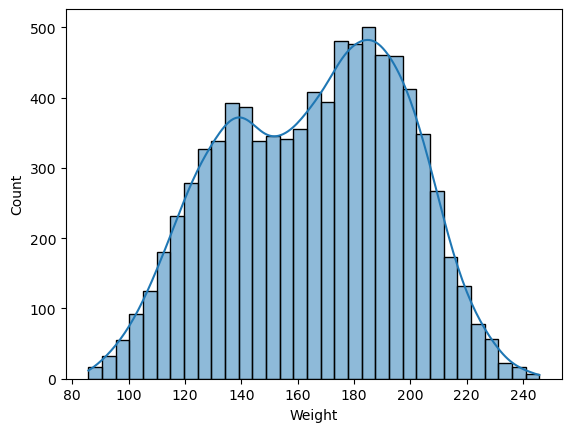

In [28]:
sns.histplot(remove_out_df['Weight'], kde=True)